In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sc
import pandas as pd

In [3]:
data = pd.read_csv('country_data.csv')
display(data.head())

,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


,Country,Life Expectancy,GDP
0,Afghanistan,58.19375,340.015425
1,Albania,75.15625,2119.726679
2,Algeria,73.61875,2847.853392
3,Angola,49.01875,1975.143045
4,Antigua and Barbuda,75.05625,9759.305728


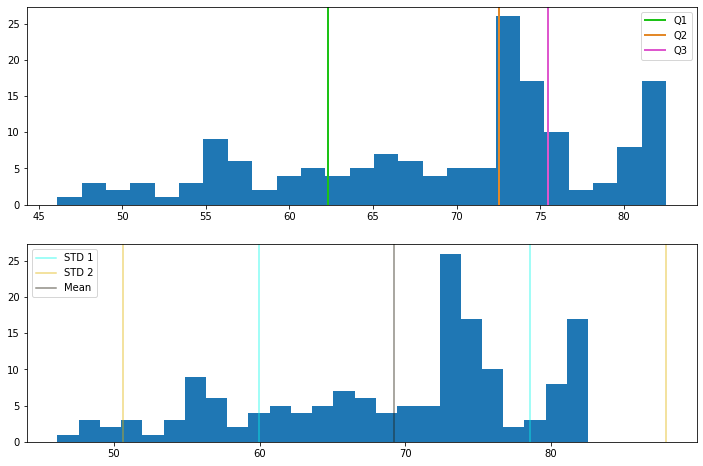

[62.325     72.525     75.4421875]


In [43]:
# inspecting life expectancy data into datasets
life_expectancy = data['Life Expectancy']
life_expectancy_avg = np.mean(life_expectancy)
life_expectancy_std = np.std(life_expectancy)
std_plus1 = life_expectancy_avg + life_expectancy_std
std_min1 = life_expectancy_avg-life_expectancy_std
std_plus2 = life_expectancy_avg + (2*life_expectancy_std)
std_min2 = life_expectancy_avg - (2*life_expectancy_std)

# getting quartile to create equally 4 quarters
life_expectancy_variance = np.var(life_expectancy)
life_expectancy_q1 = np.quantile(life_expectancy, 0.25)
life_expectancy_q2 = np.median(life_expectancy)
life_expectancy_q3 = np.quantile(life_expectancy, 0.75)
life_expectancy_quartile = np.quantile(life_expectancy, [0.25,0.5,0.75])

                                       
#creating figure and ploting data into histogram
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
plt.hist(life_expectancy, bins=25)
plt.axvline(life_expectancy_q1, color= '#1dc217', label='Q1',linewidth=2)
plt.axvline(life_expectancy_q2, color= '#e38929', label='Q2',linewidth=2)
plt.axvline(life_expectancy_q3, color= '#de57ce', label='Q3',linewidth=2)
plt.legend()
# second datasets tobe compared
ax2= plt.subplot(2,1,2)
plt.hist(life_expectancy, bins=25)
plt.axvline(std_plus1, color='#08fcec', label ='STD 1',alpha=0.5)
plt.axvline(std_min1, color='#08fcec',alpha=0.5)
plt.axvline(std_plus2, color='#e0b404', label ='STD 2',alpha=0.5)
plt.axvline(std_min2, color='#e0b404',alpha=0.5)
plt.axvline(life_expectancy_avg, color='#1f1a0a', label='Mean', alpha=0.5)
plt.legend()
plt.show()


print(life_expectancy_quartile)

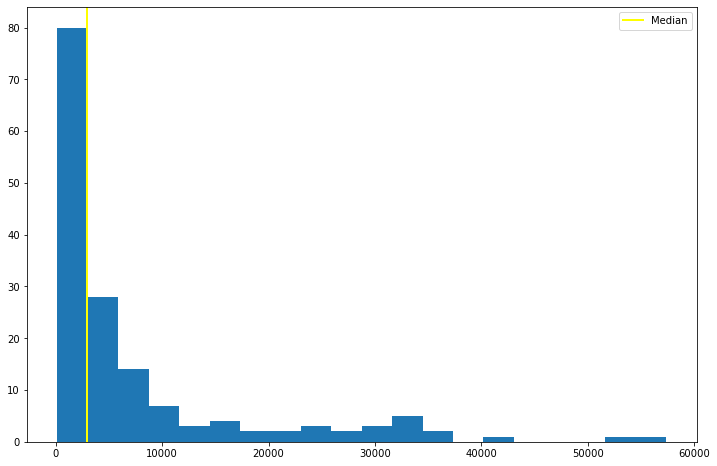

In [23]:
# splitting data into two split to find country with low and high gdp
gdp = data['GDP']
gdp_median = np.median(gdp)
#selecting low gdp country
low_gdp = data[data['GDP'] <= gdp_median]
#selecting high gdp country
high_gdp = data[data['GDP'] > gdp_median]

plt.figure(figsize=(12,8))
ax1 = plt.subplot()
plt.hist(gdp, bins=20)
plt.axvline(gdp_median, color='yellow',linewidth=2, label='Median')
plt.legend()
plt.show()

[56.3375  64.34375 71.7375 ]
[72.965625 75.15625  80.521875]


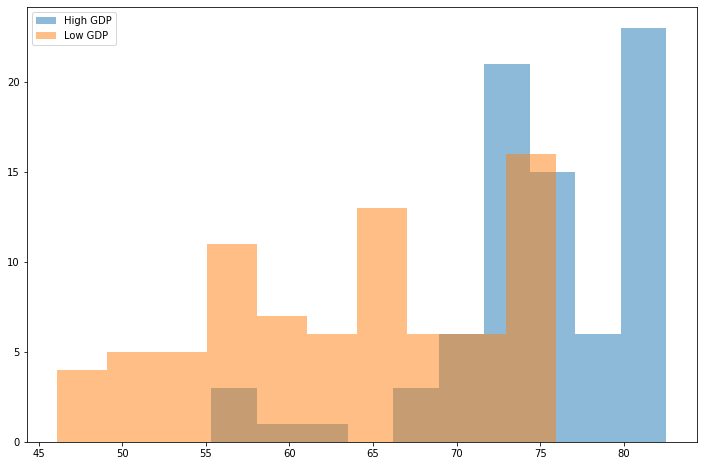

In [35]:
low_gdp_quartile = np.quantile(low_gdp['Life Expectancy'], [0.25,0.5,0.75])
high_gdp_quartile = np.quantile(high_gdp['Life Expectancy'], [0.25,0.5,0.75])
print(low_gdp_quartile)
print(high_gdp_quartile)

plt.figure(figsize=(12,8))
ax2 = plt.subplot()
plt.hist(high_gdp['Life Expectancy'], alpha=0.5, label='High GDP')
plt.hist(low_gdp['Life Expectancy'], alpha=0.5, label='Low GDP')
plt.legend()
plt.show()